In [1]:
from datetime import datetime
import numpy as np
import xarray as xr 
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

/tmp/ipykernel_109430/1859342228.py:5: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [3]:
var_da = 't'
level = .95
startdate = datetime(2011,1,1,0)
enddate = datetime(2011,12,31,18)
time_slice = slice(startdate,enddate)
hybrid_1_9_1_9_file = '/skydata2/dylanelliott/letkf-hybrid-speedy/DATA/uniform_letkf_anal/hybrid_1_9_1_9_mem_1_fixed_20110101_20120115/out.nc'
hybrid_1_9_1_9_ds = xr.open_dataset(hybrid_1_9_1_9_file)[var_da].sel(lev=level,time=time_slice)
hybrid_1_9_1_9_at_sahara = hybrid_1_9_1_9_ds.isel(lat=28,lon=5).values


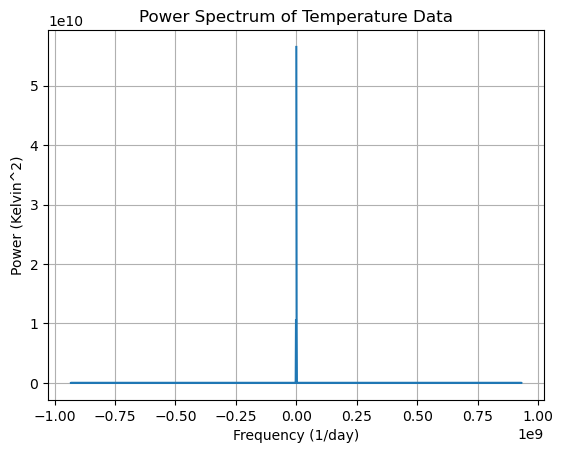

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Load temperature data (replace this with your data)
# For this example, let's generate some random data
num_points = len(hybrid_1_9_1_9_at_sahara)
temperature_data = hybrid_1_9_1_9_at_sahara

# Define the Hamming window
window = np.hamming(len(temperature_data))

# Apply the window to the data
windowed_data = temperature_data * window

# Perform the FFT
fft_result = np.fft.fft(windowed_data)

# Compute the power spectrum
power_spectrum = np.abs(fft_result)**2

# Frequency axis (assuming 6-hourly data)
sampling_rate = 1.0 / (6.0 * 3600.0)  # 6 hours in seconds
freq_axis = np.fft.fftfreq(len(windowed_data), d=sampling_rate)

# Convert frequency from Hz to cycles per day
freq_axis_cycles_per_day = freq_axis * 3600 * 24

# Convert power spectrum to Kelvin^2
power_spectrum_kelvin_squared = power_spectrum

# Plot the power spectrum
plt.plot(freq_axis_cycles_per_day, power_spectrum_kelvin_squared)
plt.xlabel('Frequency (1/day)')
plt.ylabel('Power (Kelvin^2)')
plt.title('Power Spectrum of Temperature Data')
plt.grid(True)
plt.show()
